<a href="https://colab.research.google.com/github/sumitjoshi77/Country-covid--19/blob/main/Sumit_Joshi_Assignment_for_Data_Scientist_Apollo_Energy_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the Basic Life Cycle of a Data Science Project.

The data science life cycle include the processes like collecting the data extraction, loading it into your program. When the data is loaded in the program you have to clear the data are manipulated accourding to your requirements. Then you have to drow conclusion or understand the data through out by visualization to understand the relation between the different plot point of your data.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
path = "/content/drive/MyDrive/Assignment for Data Scientist AAssignment for Data Scientist Apollo Energy Analyticspollo Energy Analytics/df_covid19_countries.csv"
df = pd.read_csv(path)
df.head(5)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000012
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0,0.0,0.000012,0.000000


In [17]:
df.tail(5)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
245720,Zimbabwe,2023-02-17,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.6154,0.0
245721,Zimbabwe,2023-02-18,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.6154,0.0
245722,Zimbabwe,2023-02-19,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.6154,0.0
245723,Zimbabwe,2023-02-20,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.6154,0.0
245724,Zimbabwe,2023-02-21,263642.0,0.0,0.0,5662.0,0.0,0.429,0.0,0.0,0.0,0.0,0.0,16320539.0,0.0,1.6154,0.0


In [18]:
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'reproduction_rate', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'population',
       'vaccination_ratio', 'prevalence', 'incidence'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location                 245725 non-null  object 
 1   date                     245725 non-null  object 
 2   total_cases              245725 non-null  float64
 3   new_cases                245725 non-null  float64
 4   new_cases_smoothed       245725 non-null  float64
 5   total_deaths             245725 non-null  float64
 6   new_deaths               245725 non-null  float64
 7   new_deaths_smoothed      245725 non-null  float64
 8   reproduction_rate        245725 non-null  float64
 9   total_vaccinations       245725 non-null  float64
 10  people_vaccinated        245725 non-null  float64
 11  people_fully_vaccinated  245725 non-null  float64
 12  total_boosters           245725 non-null  float64
 13  population               245725 non-null  float64
 14  vacc

In [20]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
count,2.457250e+05,2.457250e+05,245725.000000,2.457250e+05,245725.000000,245725.000000,245725.000000,2.457250e+05,2.457250e+05,2.457250e+05,2.457250e+05,2.457250e+05,245725.000000,245725.000000,245725.000000
mean,1.262001e+06,2.794144e+03,2789.978233,1.756822e+04,27.880269,27.834659,0.680876,2.019124e+07,6.524882e+06,5.476931e+06,1.766295e+06,3.639720e+07,12.451571,7.021943,0.022036
std,5.514956e+06,1.715704e+04,15845.936582,7.246697e+04,193.903385,147.882771,0.525547,1.728260e+08,5.114059e+07,4.473243e+07,1.393745e+07,1.407551e+08,26.347803,12.356165,0.158775
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.070000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000,0.000000,0.000000
25%,2.717000e+03,0.000000e+00,1.571000,2.800000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.242720e+05,0.000000,0.080016,0.000000
50%,3.759100e+04,1.600000e+01,44.286000,5.510000e+02,0.000000,0.286000,0.810000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.336393e+06,0.000000,0.995019,0.000222
75%,4.049700e+05,4.710000e+02,607.000000,6.030000e+03,5.000000,6.429000,1.070000,3.293000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.620798e+07,0.000000,8.196093,0.007216
max,1.031685e+08,1.354500e+06,806959.857000,1.117820e+06,59895.000000,10364.714000,5.870000,3.491077e+09,1.310292e+09,1.276760e+09,8.269130e+08,1.425887e+09,129.066316,72.212717,32.441022


In [21]:
df.shape

(245725, 17)

In [22]:
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
total_cases,1.000000,0.452127,0.497314,0.883642,0.275464,0.364666,0.071769,0.353976,0.574338,0.548335,0.462032,0.337954,0.329810,0.239726,0.036058
new_cases,0.452127,1.000000,0.920505,0.408343,0.424488,0.492865,0.110533,0.136079,0.211944,0.195048,0.250451,0.193626,0.215829,0.103881,0.146684
new_cases_smoothed,0.497314,0.920505,1.000000,0.445086,0.428369,0.547903,0.108834,0.148459,0.231156,0.212583,0.273934,0.209537,0.233720,0.116191,0.118025
total_deaths,0.883642,0.408343,0.445086,1.000000,0.352234,0.466290,0.100139,0.329610,0.554914,0.520325,0.371902,0.357703,0.276783,0.120005,0.009053
new_deaths,0.275464,0.424488,0.428369,0.352234,1.000000,0.773242,0.080102,0.065497,0.129572,0.101141,0.065948,0.218264,0.056400,0.000524,0.019379
new_deaths_smoothed,0.364666,0.492865,0.547903,0.466290,0.773242,1.000000,0.099994,0.093671,0.180509,0.143635,0.106477,0.285466,0.076420,0.001846,0.016787
reproduction_rate,0.071769,0.110533,0.108834,0.100139,0.080102,0.099994,1.000000,0.054714,0.048193,0.045599,0.027940,0.112909,0.108836,-0.035296,0.038438
total_vaccinations,0.353976,0.136079,0.148459,0.329610,0.065497,0.093671,0.054714,1.000000,0.593381,0.609660,0.437877,0.662824,0.156360,0.005604,-0.000632
people_vaccinated,0.574338,0.211944,0.231156,0.554914,0.129572,0.180509,0.048193,0.593381,1.000000,0.959589,0.610339,0.518627,0.269436,0.028201,0.003386
people_fully_vaccinated,0.548335,0.195048,0.212583,0.520325,0.101141,0.143635,0.045599,0.609660,0.959589,1.000000,0.671311,0.487689,0.263843,0.033232,0.004935


In [23]:
df.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
vaccination_ratio          0
prevalence                 0
incidence                  0
dtype: int64

In [24]:
df['location'].unique().shape

(236,)

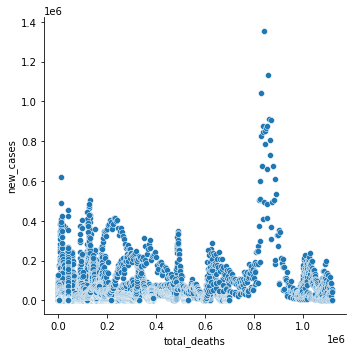

In [25]:
sns.relplot(x="total_deaths", y="new_cases", data=df)

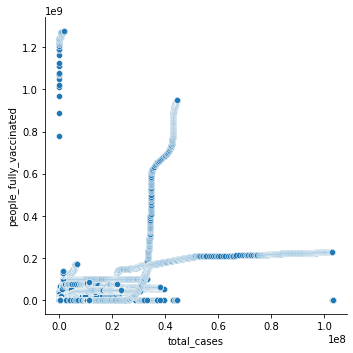

In [26]:
sns.relplot(x="total_cases", y="people_fully_vaccinated", data=df)

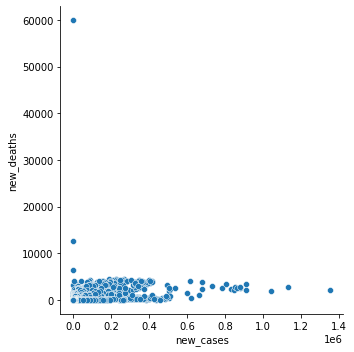

In [27]:
sns.relplot(x="new_cases", y="new_deaths", data=df)

In [28]:
x = df[['new_cases','reproduction_rate','vaccination_ratio', 'prevalence', 'incidence']]
y = df[['new_deaths']]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 62)

In [30]:
Sd_x = StandardScaler()
x_train = Sd_x.fit_transform(x_train)
x_test = Sd_x.fit_transform(x_test)

Sd_y = StandardScaler()
y_train = Sd_y.fit_transform(y_train)
y_test = Sd_y.fit_transform(y_test)

In [31]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [32]:
reg.score(x_train, y_train)

0.1740361990305942

In [33]:
predreg = reg.predict(x_test)
predreg

array([[-0.08165781],
       [-0.03353805],
       [ 0.0097148 ],
       ...,
       [ 0.00166477],
       [-0.02392058],
       [-0.08172669]])

In [34]:
x_train.shape

(196580, 5)

In [35]:
y_train.shape

(196580, 1)